In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from sklearn.linear_model import LinearRegression

This Dataset is a random dataset that compares years of experience to salary. I attempt to create a linear regression model from scratch using a cost function, J, and gradient descent to fit the model.

In [6]:
df = pd.read_csv("C:\\Users\\vemul\\Machine Learning\\CSV Files\\Salary_Data.csv")

In [3]:
#This is a small dataset with just 30 rows
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [7]:
#splitting the training data into input and output
x_train = df.YearsExperience
y_train = df.Salary

In the following cells, I attempt to fit the model manually.

In [22]:
def compute_model_output(x,w,b):
    m = x_train.shape[0]
    f = np.zeros(m)
    for i in range(m):
        f[i] = w * x[i] + b

    return f

In [6]:
tmp_model = compute_model_output(x_train, 9000, 30000)

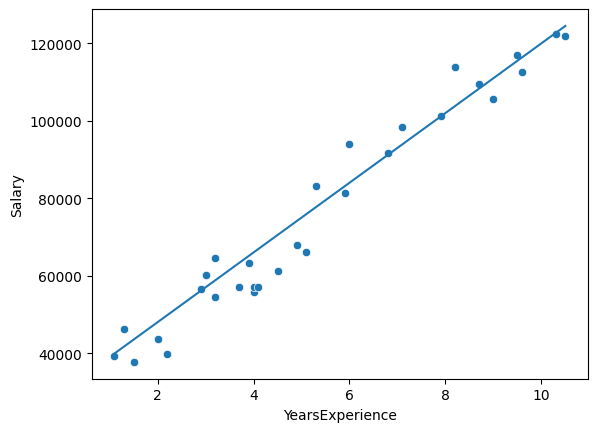

In [7]:
#There is a positive linear correlation between Years of Experience and Salary
sns.scatterplot(x = "YearsExperience", y = "Salary", data = df)
plt.plot(x_train, tmp_model)

Although this seems to be a good fit, it's not the best fit. In the following cells, I analyze a cost function J and eventually use it for gradient descent

In [8]:
#Here I created an array of numbers to test out for w and b. Using both, I created a meshgrid to test out each combination of w and b
w_vals = np.arange(1000,15000,100)
b_vals = np.arange(10000,80000,1000)
W, B = np.meshgrid(w_vals, b_vals)

In [9]:
#This computes the cost for a single w and b value
def compute_cost(x,y,w,b):
    m = len(x)
    cost = 0
    for i in range(m):
        cost += (w * x[i] + b - y[i])**2
    return cost / (2*m)

In [10]:
#Here I compute the cost of each combination of w and b
J_values = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_values[i,j] = compute_cost(x_train, y_train, W[i,j], B[i,j])

Text(0, 0.5, 'b')

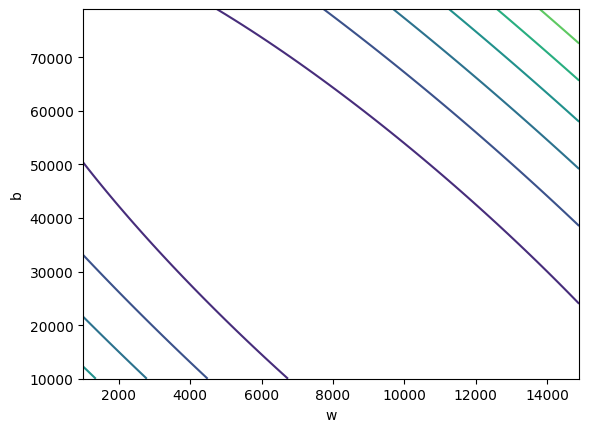

In [11]:
plt.figure()
plt.contour(W,B,J_values)
plt.xlabel("w")
plt.ylabel("b")

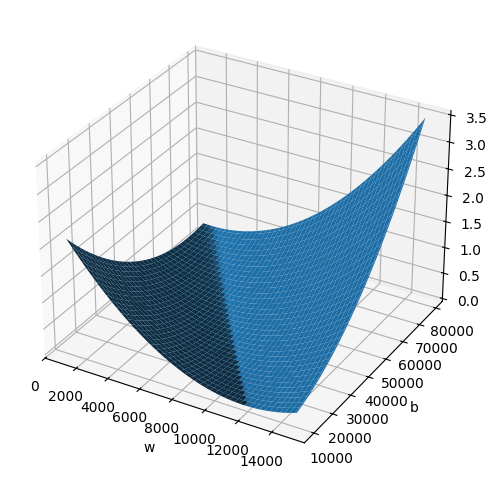

In [12]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W,B,J_values)
ax.set_xlabel('w')
ax.set_ylabel('b')
#ax.set_zlabel('Cost J')
plt.show()

Now that we know more about the cost function, I use gradient descent to fit the model

In [3]:
#calculate the gradient of J (partial derivatives of w and b)
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    #partial derivative of w
    dj_dw = 0
    #partial deraivative of b
    dj_db = 0

    #calculate the sum for all the training values
    for i in range(m):
        prediction = w * x[i] + b
        dj_dw += ((prediction - y[i]) * x[i])        
        dj_db += (prediction - y[i])

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [39]:
def gradient_descent(x, y, w, b, iterations, alpha):
    history = []
        
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(x, y, w, b)
        history.append((w, b, cost))


    return w, b, history


In [50]:
w_gradient, b_gradient, history = gradient_descent(x_train, y_train, 12000, 60000, 10000, 0.01)
print(f"w = {w_gradient} and b = {b_gradient}")

w = 9449.962318327744 and b = 25792.20021974296


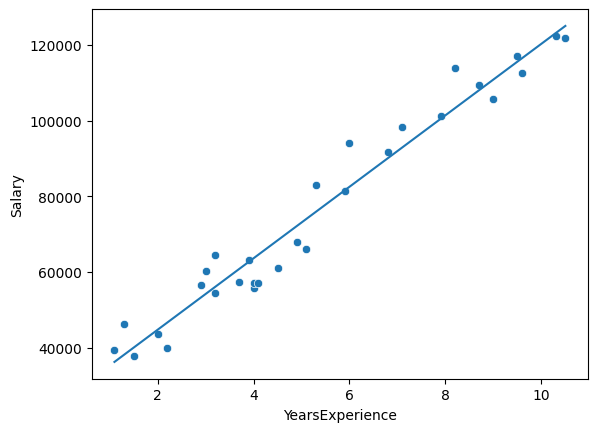

In [51]:
gradient_model = compute_model_output(x_train, w_gradient, b_gradient)

sns.scatterplot(x = "YearsExperience", y = "Salary", data = df)
plt.plot(x_train, gradient_model)

The gradient descent algorithm was able to fit a line of best fit. Here I analyze how the gradient descent took place

In [52]:
w_path = [pt[0] for pt in history]
b_path = [pt[1] for pt in history]
j_path = [pt[2] for pt in history]

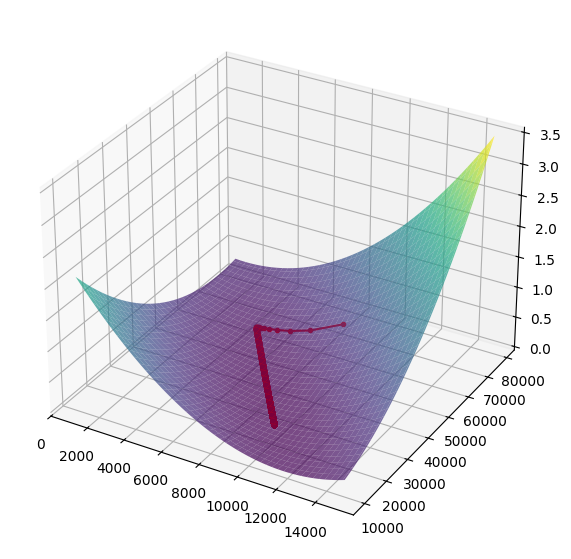

In [63]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W,B,J_values, cmap = "viridis", alpha=0.7)

ax.plot(w_path, b_path, j_path, color='r', marker='o', markersize=3)



Since this was all done by scratch, I now use scikit learn to create a model. I do this to see if my model above was accurate

In [71]:
X = df[["YearsExperience"]]
Y = df["Salary"]

In [72]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [73]:
model.coef_

array([9449.96232146])

In [74]:
model.intercept_

np.float64(25792.20019866871)

The slope and the Y intercept from the scikit learn model is basically the same as the model from scratch